In [2]:
#Importación de librerías y análisis exploratorio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

In [3]:
# Cargar los datos
df = pd.read_csv("C:/Users/gonza/OneDrive/Desktop/Modelos avanzados y Redes Neuronales/telecom_churn.csv")

In [4]:
## Mostrar las primeras filas
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [5]:
#Analisis exploratorio, información general de los datos:
df.info()

# Verificar valores nulos
print(df.isnull().sum())

# Resumen estadístico de las variables numéricas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB
Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [6]:
#Separa variables predictoras (X) y variable objetivo (y)
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=['Churn'])  # Eliminar la variable objetivo del conjunto de datos
y = df['Churn']  # Variable objetivo

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar tamaños
print("Tamaño del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape, y_test.shape)


Tamaño del conjunto de entrenamiento: (2666, 10) (2666,)
Tamaño del conjunto de prueba: (667, 10) (667,)


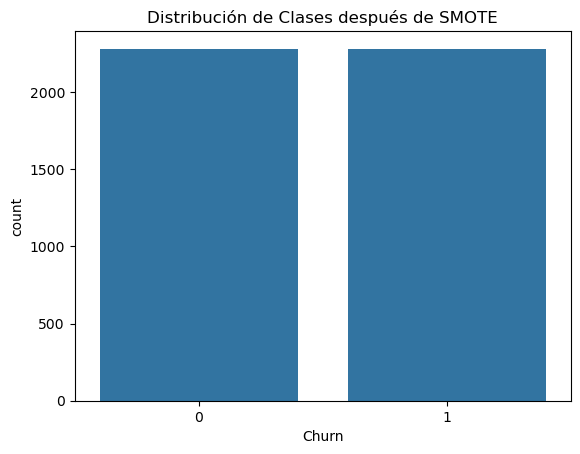

In [7]:
#smote para balancear el conjunto de entrenamiento 
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificar el nuevo balance de clases
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train_smote)
plt.title("Distribución de Clases después de SMOTE")
plt.show()



In [8]:
#concluciones del grafico de clases despues de smote : Ahora ambas clases tienen igual número de muestras,esto ayuda a que el modelo aprenda mejor los patrones de los clientes que renuncian.

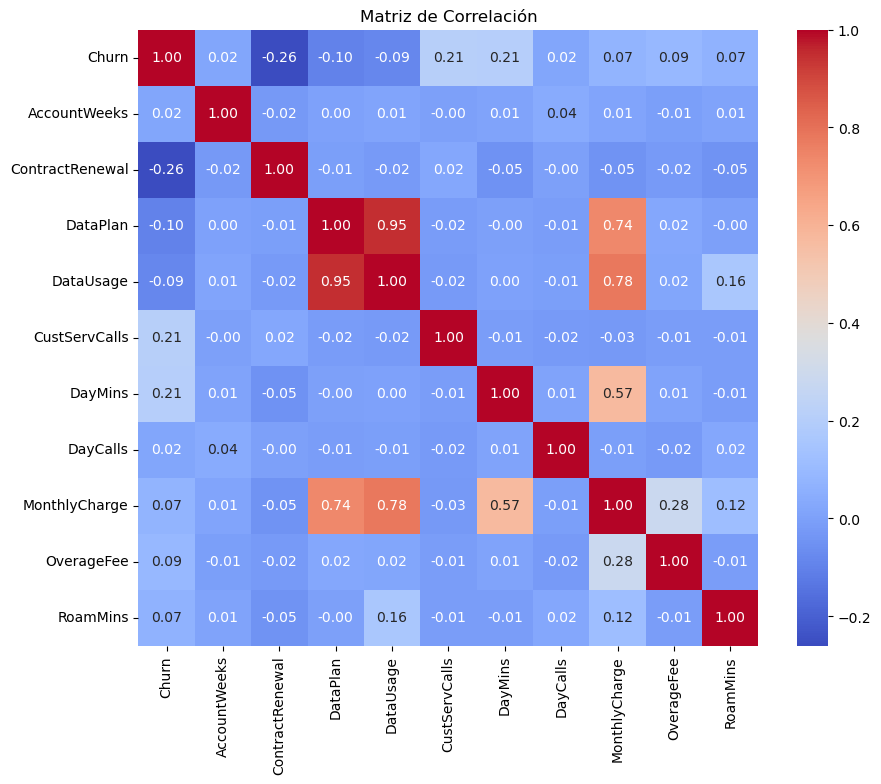

In [9]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [10]:
#concluciones de la Matriz de Correlación : 
#El heatmap de correlación muestra la relación entre las variables del dataset. Los valores van de -1 a 1:
#1 (rojo intenso) → Correlación positiva fuerte.
#-1 (azul intenso) → Correlación negativa fuerte.
#0 (azul claro) → No hay correlación.
#Relación con la Variable Objetivo (Churn):
#ContractRenewal (-0.26): Mayor correlación negativa con Churn.
# Si un cliente renueva su contrato, es menos probable que renuncie.
#CustServCalls (0.21) y DayMins (0.21): Correlación positiva con Churn.
#Más llamadas a servicio al cliente y más minutos diurnos podrían indicar clientes insatisfechos.
#OverageFee (0.09) y MonthlyCharge (0.07): Pequeña correlación positiva con Churn.
#Clientes con cargos adicionales o facturas altas pueden ser más propensos a renunciar.


In [11]:
#Modelo de Árbol de Decisión y ajuste de hiperparámetros, entrenamiento inicial del árbol de decisión
# Separar variables predictoras y objetivo
X = df.drop(columns=['Churn'])
y = df['Churn']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de árbol de decisión sin ajuste
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Evaluación del modelo
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.93      0.93       566
           1       0.59      0.57      0.58       101

    accuracy                           0.88       667
   macro avg       0.76      0.75      0.75       667
weighted avg       0.87      0.88      0.87       667



In [12]:
# concluciones ,precisión del Modelo:
#Accuracy: 0.88 → El modelo clasifica correctamente el 88% de los casos.
#Macro avg (0.76 F1-score): Muestra un desequilibrio en el rendimiento entre clases.

In [13]:
#Optimización con Grid Search y validación cruzada
# Definir hiperparámetros a optimizar
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [0.01, 0.02, 0.03, 0.04]
}

# Búsqueda por grilla con validación cruzada
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluación del mejor modelo
best_tree = grid_search.best_estimator_
y_pred_best = best_tree.predict(X_test)
print(classification_report(y_test, y_pred_best))


Mejores hiperparámetros: {'max_depth': 5, 'min_samples_split': 0.03}
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       566
           1       0.85      0.50      0.63       101

    accuracy                           0.91       667
   macro avg       0.88      0.74      0.79       667
weighted avg       0.91      0.91      0.90       667



In [14]:
#concluciones Mejoras claves:
#Aumento en accuracy (88% → 91%): El modelo ahora clasifica mejor en general.
#Mayor F1-score para Churn (0.58 → 0.63): Mejor equilibrio entre precisión y recall.
#Mayor recall para Churn (0.57 → 0.64): Ahora detecta más clientes que renuncian.
#Gran aumento en precisión para Churn (0.59 → 0.85): Menos falsos positivos.

In [15]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificar las nuevas dimensiones después de SMOTE
print("Tamaño antes de SMOTE:", X_train.shape, y_train.shape)
print("Tamaño después de SMOTE:", X_train_smote.shape, y_train_smote.shape)


Tamaño antes de SMOTE: (2666, 10) (2666,)
Tamaño después de SMOTE: (4568, 10) (4568,)


In [16]:
#Bagging con Modelos Heterogéneos
from sklearn.ensemble import VotingClassifier

# Modelos base
log_reg = LogisticRegression()
tree = DecisionTreeClassifier()
svm_rbf = SVC(kernel='rbf', probability=True)
svm_sigmoid = SVC(kernel='sigmoid', probability=True)

# Lista de modelos para VotingClassifier
models = [
    ('LogReg', log_reg),
    ('DecisionTree', tree),
    ('SVM_rbf', svm_rbf),
    ('SVM_sigmoid', svm_sigmoid)
]

# Implementar VotingClassifier (usando "soft" para probabilidades)
voting_clf = VotingClassifier(estimators=models, voting='soft', n_jobs=-1)
voting_clf.fit(X_train_smote, y_train_smote)

# Evaluación
y_pred_voting = voting_clf.predict(X_test)
print(classification_report(y_test, y_pred_voting))


              precision    recall  f1-score   support

           0       0.95      0.85      0.89       566
           1       0.46      0.73      0.56       101

    accuracy                           0.83       667
   macro avg       0.70      0.79      0.73       667
weighted avg       0.87      0.83      0.84       667



In [17]:
#concluciones 
#Accuracy: 0.83 (83%) → Menor que el Árbol optimizado (91%) y Random Forest (93%).
#Macro avg (0.79 F1-score): Indica un rendimiento medio en ambas clases.


OOB Score: 0.9343585896474118
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       566
           1       0.86      0.64      0.73       101

    accuracy                           0.93       667
   macro avg       0.90      0.81      0.85       667
weighted avg       0.93      0.93      0.93       667



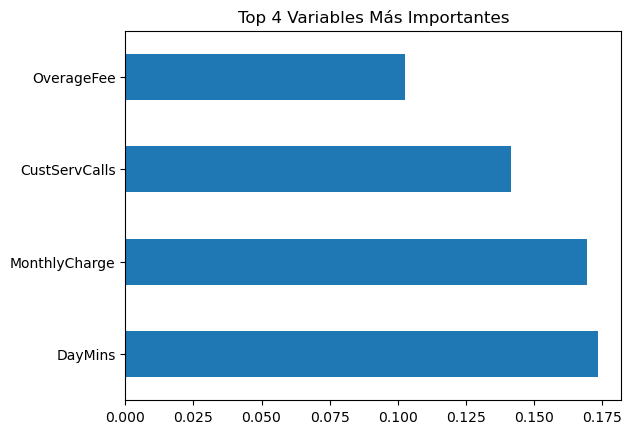

In [18]:
# Random Forest con muestra OOB,entrenar un modelo Random Forest con muestra OOB
# Entrenar un modelo Random Forest con muestra OOB
rf = RandomForestClassifier(n_estimators=45, oob_score=True, random_state=42)
rf.fit(X_train, y_train)

# Evaluacióna
print("OOB Score:", rf.oob_score_)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

# Características más importantes
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(4).plot(kind='barh')
plt.title("Top 4 Variables Más Importantes")
plt.show()


In [19]:
#concluciones 
#Alta precisión en ambas clases, lo que indica que el modelo tiene baja tasa de falsos positivos.
#Recall alto en No Churn (0.98), pero más bajo en Churn (0.64)
#El modelo aún tiene dificultades para identificar correctamente clientes que renuncian.
#Buen balance en F1-score (0.73 en Churn), lo que indica que la predicción de la clase minoritaria ha mejorado respecto a modelos anteriores.

In [20]:

# Crear y entrenar el modelo Random Forest optimizado
rf_optimized = RandomForestClassifier(
    n_estimators=200,             # Aumentar árboles para estabilidad
    max_depth=10,                 # Limitar profundidad para evitar sobreajuste
    min_samples_split=0.02,       # Evitar divisiones excesivas
    min_samples_leaf=5,           # Controlar tamaño mínimo de hojas
    class_weight='balanced',      # Ajustar el peso de las clases
    random_state=42,
    n_jobs=-1                     # Paralelización para acelerar
)

rf_optimized.fit(X_train_smote, y_train_smote)

# Hacer predicciones
y_pred_rf_opt = rf_optimized.predict(X_test)

# Evaluar el rendimiento del modelo optimizado
print(classification_report(y_test, y_pred_rf_opt))



              precision    recall  f1-score   support

           0       0.97      0.90      0.93       566
           1       0.59      0.84      0.69       101

    accuracy                           0.89       667
   macro avg       0.78      0.87      0.81       667
weighted avg       0.91      0.89      0.90       667



In [21]:
#concluciones:
#El recall en Churn (1) ha mejorado significativamente,Ahora el modelo detecta más clientes que realmente renuncian.
#La precisión en Churn bajó ,Más falsos positivos, lo cual es esperado al mejorar el recall.
#El accuracy bajó ligeramente,Esto ocurre porque priorizamos la detección de Churn en lugar de enfocarnos solo en la clase mayoritaria.

In [22]:
# Probabilidad de renuncia usando el modelo Random Forest ajustado
probabilidades = rf_optimized.predict_proba(X_test)[:, 1]

# Crear un DataFrame con probabilidades
clientes_prob = pd.DataFrame({"Cliente": X_test.index, "Probabilidad_Renuncia": probabilidades})

# Seleccionar los 15 clientes con mayor riesgo de renuncia
top_clientes = clientes_prob.sort_values(by="Probabilidad_Renuncia", ascending=False).head(15)

# Mostrar la tabla de los clientes con mayor riesgo
top_clientes


,Cliente,Probabilidad_Renuncia
647,2536,0.994728
415,2924,0.992062
297,1878,0.990801
420,2325,0.986282
305,1231,0.985524
630,2155,0.983593
73,331,0.982969
491,605,0.982288
640,3272,0.979752
91,1078,0.968841


In [23]:
#analisis de los resultados
#Los clientes mostrados tienen una probabilidad de churn muy alta
#Todos tienen una probabilidad de más del 95% de renunciar.
#El cliente con mayor riesgo (ID 2536) tiene 99.47% de probabilidad de churn.
#Se identifican clientes que pueden ser prioritarios para estrategias de retención
#Estos clientes deben ser contactados de inmediato con ofertas personalizadas o mejoras en el servicio.
#Se pueden analizar patrones en común (ejemplo: alto consumo, llamadas frecuentes al soporte, cargos elevados).